<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

# AC SAF - Data records (Level 3 products)

AC SAF Data records are monthly aggregated products (Level 3), regridded onto a regular latitude longitude grid. Data records are disseminated in the data format NetCDF. Data records are processed for tropospheric Ozone column, total and tropospheric Nitrogen-Dioxide column and total water vapour column. This notebook guides you how the data can be loaded, and visualized.

### Load required libraries

In [262]:
import os
import h5py
from netCDF4 import Dataset, MFDataset
import xarray as xr
import numpy as np
import pandas
import datetime

# Python libraries for visualisation
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

<hr>

## Load and browse AC SAF data records

[NetCDF4](https://unidata.github.io/netcdf4-python/netCDF4/index.html) and [xarray](http://xarray.pydata.org/en/stable/) are two Python libraries to load and browse data who are disseminated in the NetCDF format.

### Open NetCDF files with the NetCDF4 library

#### Open one individual file with NetCDF4

A NetCDF file can simply be loaded with the `Dataset` constructor of the NetCDF4 library.

In [136]:
dataset = Dataset('./GOME_O3tropo_Tropics_201801_METOPA_DLR_v1.1.nc', format='NETCDF4')
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: tropospheric_ozone_column data
    Conventions: CF -1.6
    dimensions(sizes): latitude(32), longitude(144)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude)
    groups: METADATA, PRODUCT

<br>

The dataset object contains information about the general data structure of the dataset. We see that the variables of AC SAF data records are organised in `groups`, which is analogous to directories in a filesystem. 

In order to see, which variables are available in the dataset, we have to select the `'PRODUCT' group` of our dataset object.

In [139]:
dataset.groups['PRODUCT']

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): 
    variables(dimensions): float32 tropospheric_O3(latitude,longitude), float32 tropospheric_O3_std(latitude,longitude), int32 tropospheric_O3_number(latitude,longitude), float32 tropospheric_O3_mixingratio(latitude,longitude), float32 tropospheric_O3_mixingratio_std(latitude,longitude)
    groups: SUPPORT_DATA

<br>

The file contains five variables: (1) troposphperic_O3, (2) tropospheric_O3_std, (3) tropospheric_O3_number, (4) tropospheric_O3_mixingratio and (5) tropospheric_O3_mixingratio_std. <br>

We can specify one variable of interest and get more detailed information about the variable. E.g. `tropospheric_O3` is the average column tropopshere mole content of ozone, has the units DU, which stands for Dobson Unit and is a 2D variable on a latitude longitude grid.

In [140]:
dataset.groups['PRODUCT']['tropospheric_O3']

<class 'netCDF4._netCDF4.Variable'>
float32 tropospheric_O3(latitude, longitude)
    _FillValue: 9.96921e+36
    least_significant_digit: 2
    vertical_range_bottom: surface
    standard_name: troposphere_mole_content_of_ozone
    long_name: average column troposphere_mole_content_of_ozone
    units: DU
    vertical_range_top: 10_km
path = /PRODUCT
unlimited dimensions: 
current shape = (32, 144)
filling on

<br>

If we want to access the data values, we can retrieve it by indicating `[:]` - that means that we want to access the data array. We can do this for the variables, but also for the dimensions latitude and longitude.

We see that the latitude coordinates range between 19.375 N and -19.375 S and the longitude coordinates range between -178.75 W to 178.75 E.

In [190]:
o3 = dataset.groups['PRODUCT']['tropospheric_O3'][:]
lat = dataset['latitude'][:]
lon = dataset['longitude'][:]

o3, lat, lon

(masked_array(
   data=[[22.5078125, 23.8515625, 23.3984375, ..., 22.03125, 23.640625,
          24.3515625],
         [21.6015625, 22.2890625, 23.7109375, ..., 19.8046875, 22.75,
          25.3828125],
         [19.9609375, 19.1640625, 20.78125, ..., 16.7421875, 19.6875,
          22.0390625],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=9.96921e+36,
   dtype=float32),
 masked_array(data=[-19.375, -18.125, -16.875, -15.625, -14.375, -13.125,
                    -11.875, -10.625,  -9.375,  -8.125,  -6.875,  -5.625,
            

<br>

### Open NetCDF files with xarray

#### Open one individual file with xarray

By using the `open_dataset()` function, a netCDF file can be loaded to create a new xarray Dataset. We can have a look at the resulting dataset and the latitude and longitude coordinates.

In [230]:
data = xr.open_dataset('./GOME_O3tropo_Tropics_201801_METOPA_DLR_v1.1.nc')
data, data.latitude, data.longitude

(<xarray.Dataset>
 Dimensions:    (latitude: 32, longitude: 144)
 Coordinates:
   * latitude   (latitude) float32 -19.375 -18.125 -16.875 ... 18.125 19.375
   * longitude  (longitude) float32 -178.75 -176.25 -173.75 ... 176.25 178.75
 Data variables:
     *empty*
 Attributes:
     description:  tropospheric_ozone_column data
     Conventions:  CF -1.6, <xarray.DataArray 'latitude' (latitude: 32)>
 array([-19.375, -18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
         -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,  -0.625,
          0.625,   1.875,   3.125,   4.375,   5.625,   6.875,   8.125,   9.375,
         10.625,  11.875,  13.125,  14.375,  15.625,  16.875,  18.125,  19.375],
       dtype=float32)
 Coordinates:
   * latitude  (latitude) float32 -19.375 -18.125 -16.875 ... 18.125 19.375
 Attributes:
     standard_name:  latitude
     long_name:      latitude_Centre, center of the grid box
     units:          degrees_north, <xarray.DataArray 'longitud

<br>

We see that the data variable is empty. This is due to the internal strucutre of the AC SAF data. The data is organised in groups within the NetCDF file. To load from a group, we have to pass the `group` keyword to the `open_dataset()` function. We see that the Dataset contains five Data variables. However, latitude and longitude do not contain any coordinates. 

In [231]:
var = xr.open_dataset('./GOME_O3tropo_Tropics_201801_METOPA_DLR_v1.1.nc', group='PRODUCT')
var, var.latitude, var.longitude

(<xarray.Dataset>
 Dimensions:                          (latitude: 32, longitude: 144)
 Dimensions without coordinates: latitude, longitude
 Data variables:
     tropospheric_O3                  (latitude, longitude) float32 ...
     tropospheric_O3_std              (latitude, longitude) float32 ...
     tropospheric_O3_number           (latitude, longitude) float64 ...
     tropospheric_O3_mixingratio      (latitude, longitude) float32 ...
     tropospheric_O3_mixingratio_std  (latitude, longitude) float32 ...,
 <xarray.DataArray 'latitude' (latitude: 32)>
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
 Dimensions without coordinates: latitude,
 <xarray.DataArray 'longitude' (longitude: 144)>
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34, 

<br>

We can assign the coordinate values from our dataset to the dimensions of our group dataset, with the `assing_coords` function.

In [235]:
var_assigned = var.assign_coords(latitude=data.latitude, longitude=data.longitude)
var_assigned

<xarray.Dataset>
Dimensions:                          (latitude: 32, longitude: 144)
Coordinates:
  * latitude                         (latitude) float32 -19.375 ... 19.375
  * longitude                        (longitude) float32 -178.75 ... 178.75
Data variables:
    tropospheric_O3                  (latitude, longitude) float32 ...
    tropospheric_O3_std              (latitude, longitude) float32 ...
    tropospheric_O3_number           (latitude, longitude) float64 ...
    tropospheric_O3_mixingratio      (latitude, longitude) float32 ...
    tropospheric_O3_mixingratio_std  (latitude, longitude) float32 ...

<br>

#### Open multiple NetCDF files with xarray

The `open_mfdataset` function of xarray is very useful to load multiple netCDF simultaneously. This function automatically concatenates and merges multiple files into a single xarray dataset. The behaviour of `open_mfdataset` is the same as the one of `open_dataset`. In order to access the dataset variables, we have to specify the `group` parameter. Additionally, if the dimension one want to concatenate the individual files is not defined in the original datasets, we can define a third dimension with `concat_dim`.

In [239]:
mf_dataset = xr.open_mfdataset('./*.nc', concat_dim='time',  group='PRODUCT')
mf_dataset

<xarray.Dataset>
Dimensions:                          (latitude: 32, longitude: 144, time: 12)
Dimensions without coordinates: latitude, longitude, time
Data variables:
    tropospheric_O3                  (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_std              (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_number           (time, latitude, longitude) float64 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_mixingratio      (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_mixingratio_std  (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>

<br>

The resulting Dataset has three dimensions (`latitude`, `longitude` and `time`). With `assign_coord` we can assigne the right coordinate values to the dimensions. We can use again the `data` Dataset we defined at the beginning. With the help of the `pandas` library, we can create efficiently a list of monthly time values, which we can assign to the time dimension.

In [253]:
# Build list of time coordinates with pandas
time_coords = pd.date_range('2018-01', '2018-12', freq='MS').strftime("%Y-%m").tolist()

# Assign values to Dataset dimension
mf_dataset_assigned = mf_dataset.assign_coords(latitude=data.latitude, longitude=data.longitude, time=time_coords)
mf_dataset_assigned

<xarray.Dataset>
Dimensions:                          (latitude: 32, longitude: 144, time: 12)
Coordinates:
  * latitude                         (latitude) float32 -19.375 ... 19.375
  * longitude                        (longitude) float32 -178.75 ... 178.75
  * time                             (time) <U7 '2018-01' ... '2018-12'
Data variables:
    tropospheric_O3                  (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_std              (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_number           (time, latitude, longitude) float64 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_mixingratio      (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>
    tropospheric_O3_mixingratio_std  (time, latitude, longitude) float32 dask.array<shape=(12, 32, 144), chunksize=(1, 32, 144)>

<hr>

<p style="text-align:left;"><a href="https://gitlab.eumetsat.int/eo-lab/training-atmospheric-composition/blob/master/LICENSE">&copy; Copyright 2019 eo-lab</a> <span style="float:right;">View on GitLab | Cite | Contact</span></p>

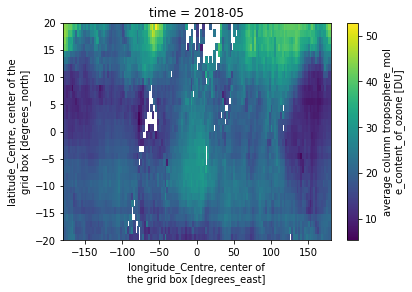

In [258]:
mf_dataset_assigned.tropospheric_O3[4].plot()

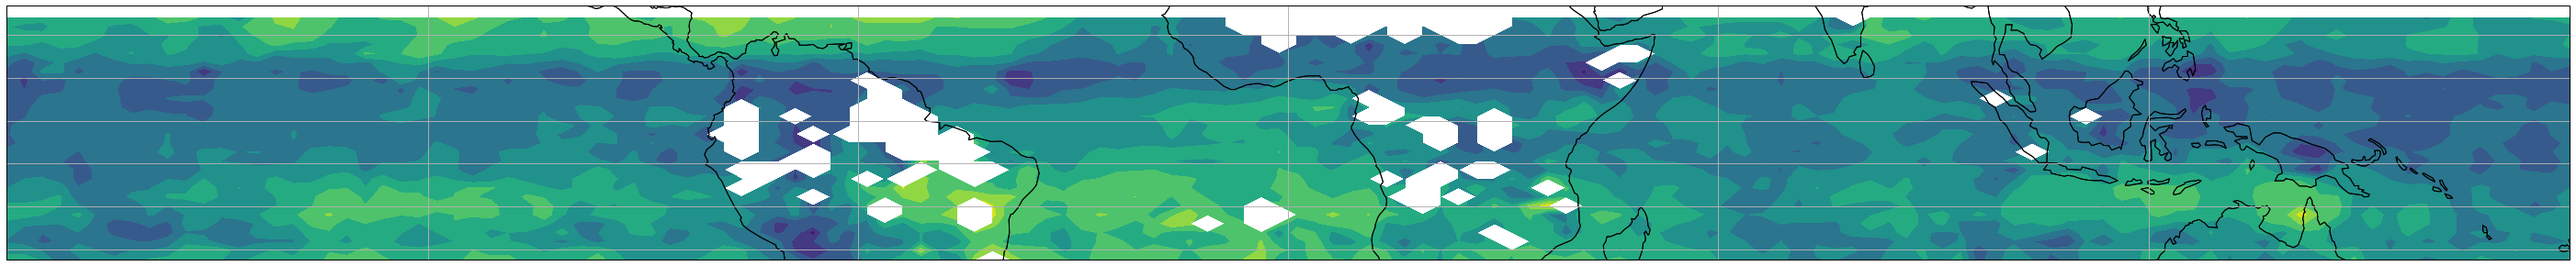

In [116]:
fig=plt.figure(figsize=(50,90))
#fig.set_dpi(400)
spl=plt.axes(projection=ccrs.PlateCarree())
spl.coastlines()
spl.gridlines()
#plt.contour(data.tropospheric_O3.longitude,data.tropospheric_O3.latitude,data.tropospheric_O3,100,
#            transform=ccrs.PlateCarree(),)

plt.contourf(test2.tropospheric_O3.longitude,test2.tropospheric_O3.latitude,test2.tropospheric_O3[11])
spl.coastlines()
spl.gridlines()

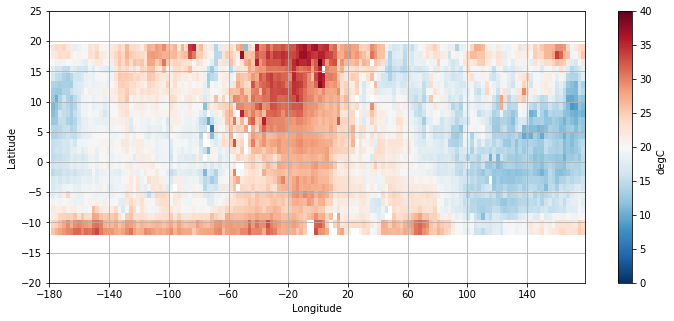

In [264]:
fig = plt.figure(figsize=(12,5))

my_cmap = plt.get_cmap('RdBu_r')

### the slice of the finalStack identifies the month and year
img1=plt.imshow(o3[:], cmap=my_cmap, extent=[-178.75,178.75,-19.375,19.375],vmin=0, vmax=40, aspect='auto')


cb = fig.colorbar(img1)
cb.set_label('degC', labelpad=5, y=0.45)

plt.grid(True)
plt.xticks(np.arange(-180,180,40))
plt.yticks(np.arange(-20,30,5))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.title("Surface air temperature for " + startDateList[431].strftime("%b %Y") + " relative to its 1981-2010 average")

plt.show()
fig.savefig('global_anomaly_field.eps', format='eps', dpi=300)